<a href="https://colab.research.google.com/github/rosangithub/ANIDS/blob/main/ANIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Based Network Intrusion Detection System using Ensemble Machine learning


In [ ]:
import numpy as np#linear algebra
import pandas as pd#data preprocessing,CSV files
import pickle#saving and loading trained model
from os import path
#importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import(StandardScaler,OrdinalEncoder,LabelEncoder,MinMaxScaler,OneHotEncoder)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer,MaxAbsScaler,RobustScaler,PowerTransformer
#importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
import glob
#path to your folder containing csv files
folder_path="/content/drive/MyDrive/data/raw/"
#get  a list of all csv files in the folder
csv_files=glob.glob(folder_path + "*.csv")
#Read all the csv files and combine them into one dataframe
df_list=(pd.read_csv(file) for file in csv_files)
df=pd.concat(df_list,ignore_index=True)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
#display the shape and the find the concatinated dataframe
nRow,nCol=df.shape
print(f"Rows:{nRow},Columns: {nCol}")


Rows:2830743,Columns: 79


In [ ]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [ ]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [ ]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
df.columns=df.columns.str.strip()
df['Label'].value_counts()

,count
Label,
BENIGN,2273097
DoS Hulk,231073
PortScan,158930
DDoS,128027
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


## Remove the missing values NaN from the dataframe

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,61374,61,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,61378,72,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,61375,75,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,61323,48,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


## Plotting the histogram of the data

In [ ]:
import matplotlib.pyplot as plt  # for plotting graphs
import numpy as np               # for numerical operations and dtype checking
%matplotlib inline

def plot_per_column_distribution(df, n_graph_shown, n_graph_per_row):
    """
    This function plots the distribution of values for multiple columns in a DataFrame.
    Numeric columns are shown as histograms.
    Categorical columns (with few unique values) are shown as bar charts.

    Parameters:
    df: pandas DataFrame
        The dataset containing columns to plot
    n_graph_shown: int
        Maximum number of columns to plot
    n_graph_per_row: int
        Number of plots to show in each row
    """

    # Count unique values in each column
    nunique = df.nunique()

    # Select columns with 2 to 49 unique values for plotting
    columns_to_plot = df.columns[(nunique > 1) & (nunique < 50)]
    print(columns_to_plot)

    # Create a smaller DataFrame containing only selected columns
    df_to_plot = df[columns_to_plot]

    # Get the number of rows and columns in the filtered DataFrame
    n_rows, n_cols = df_to_plot.shape

    # Calculate how many rows of plots we need in the figure
    n_graph_row = (n_cols + n_graph_per_row - 1) // n_graph_per_row  # integer division

    # Create the figure with calculated size
    plt.figure(num=None,
               figsize=(6 * n_graph_per_row, 8 * n_graph_row),  # width x height in inches
               dpi=80,                                         # resolution
               facecolor='w',                                  # figure background color
               edgecolor='k')                                  # figure border color

    # Loop through each selected column (up to n_graph_shown)
    for i, col_name in enumerate(columns_to_plot[:n_graph_shown]):
        # Create a subplot in the grid
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)

        # Get data of the current column
        column_data = df_to_plot[col_name]

        # Check if the column is numeric
        if np.issubdtype(column_data.dtype, np.number):
            # If numeric, plot histogram
            column_data.hist()
        else:
            # If categorical, count unique values and plot bar chart
            value_counts = column_data.value_counts()
            value_counts.plot.bar()

        # Label y-axis
        plt.ylabel('counts')

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=90)

        # Set the title of the subplot using f-string
        plt.title(f'{col_name} (column {i})')

    # Adjust spacing between subplots to prevent overlap
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

    # Display the figure
    plt.show()


Index(['Fwd PSH Flags', 'Fwd URG Flags', 'FIN Flag Count', 'SYN Flag Count',
       'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'min_seg_size_forward', 'Label'],
      dtype='object')


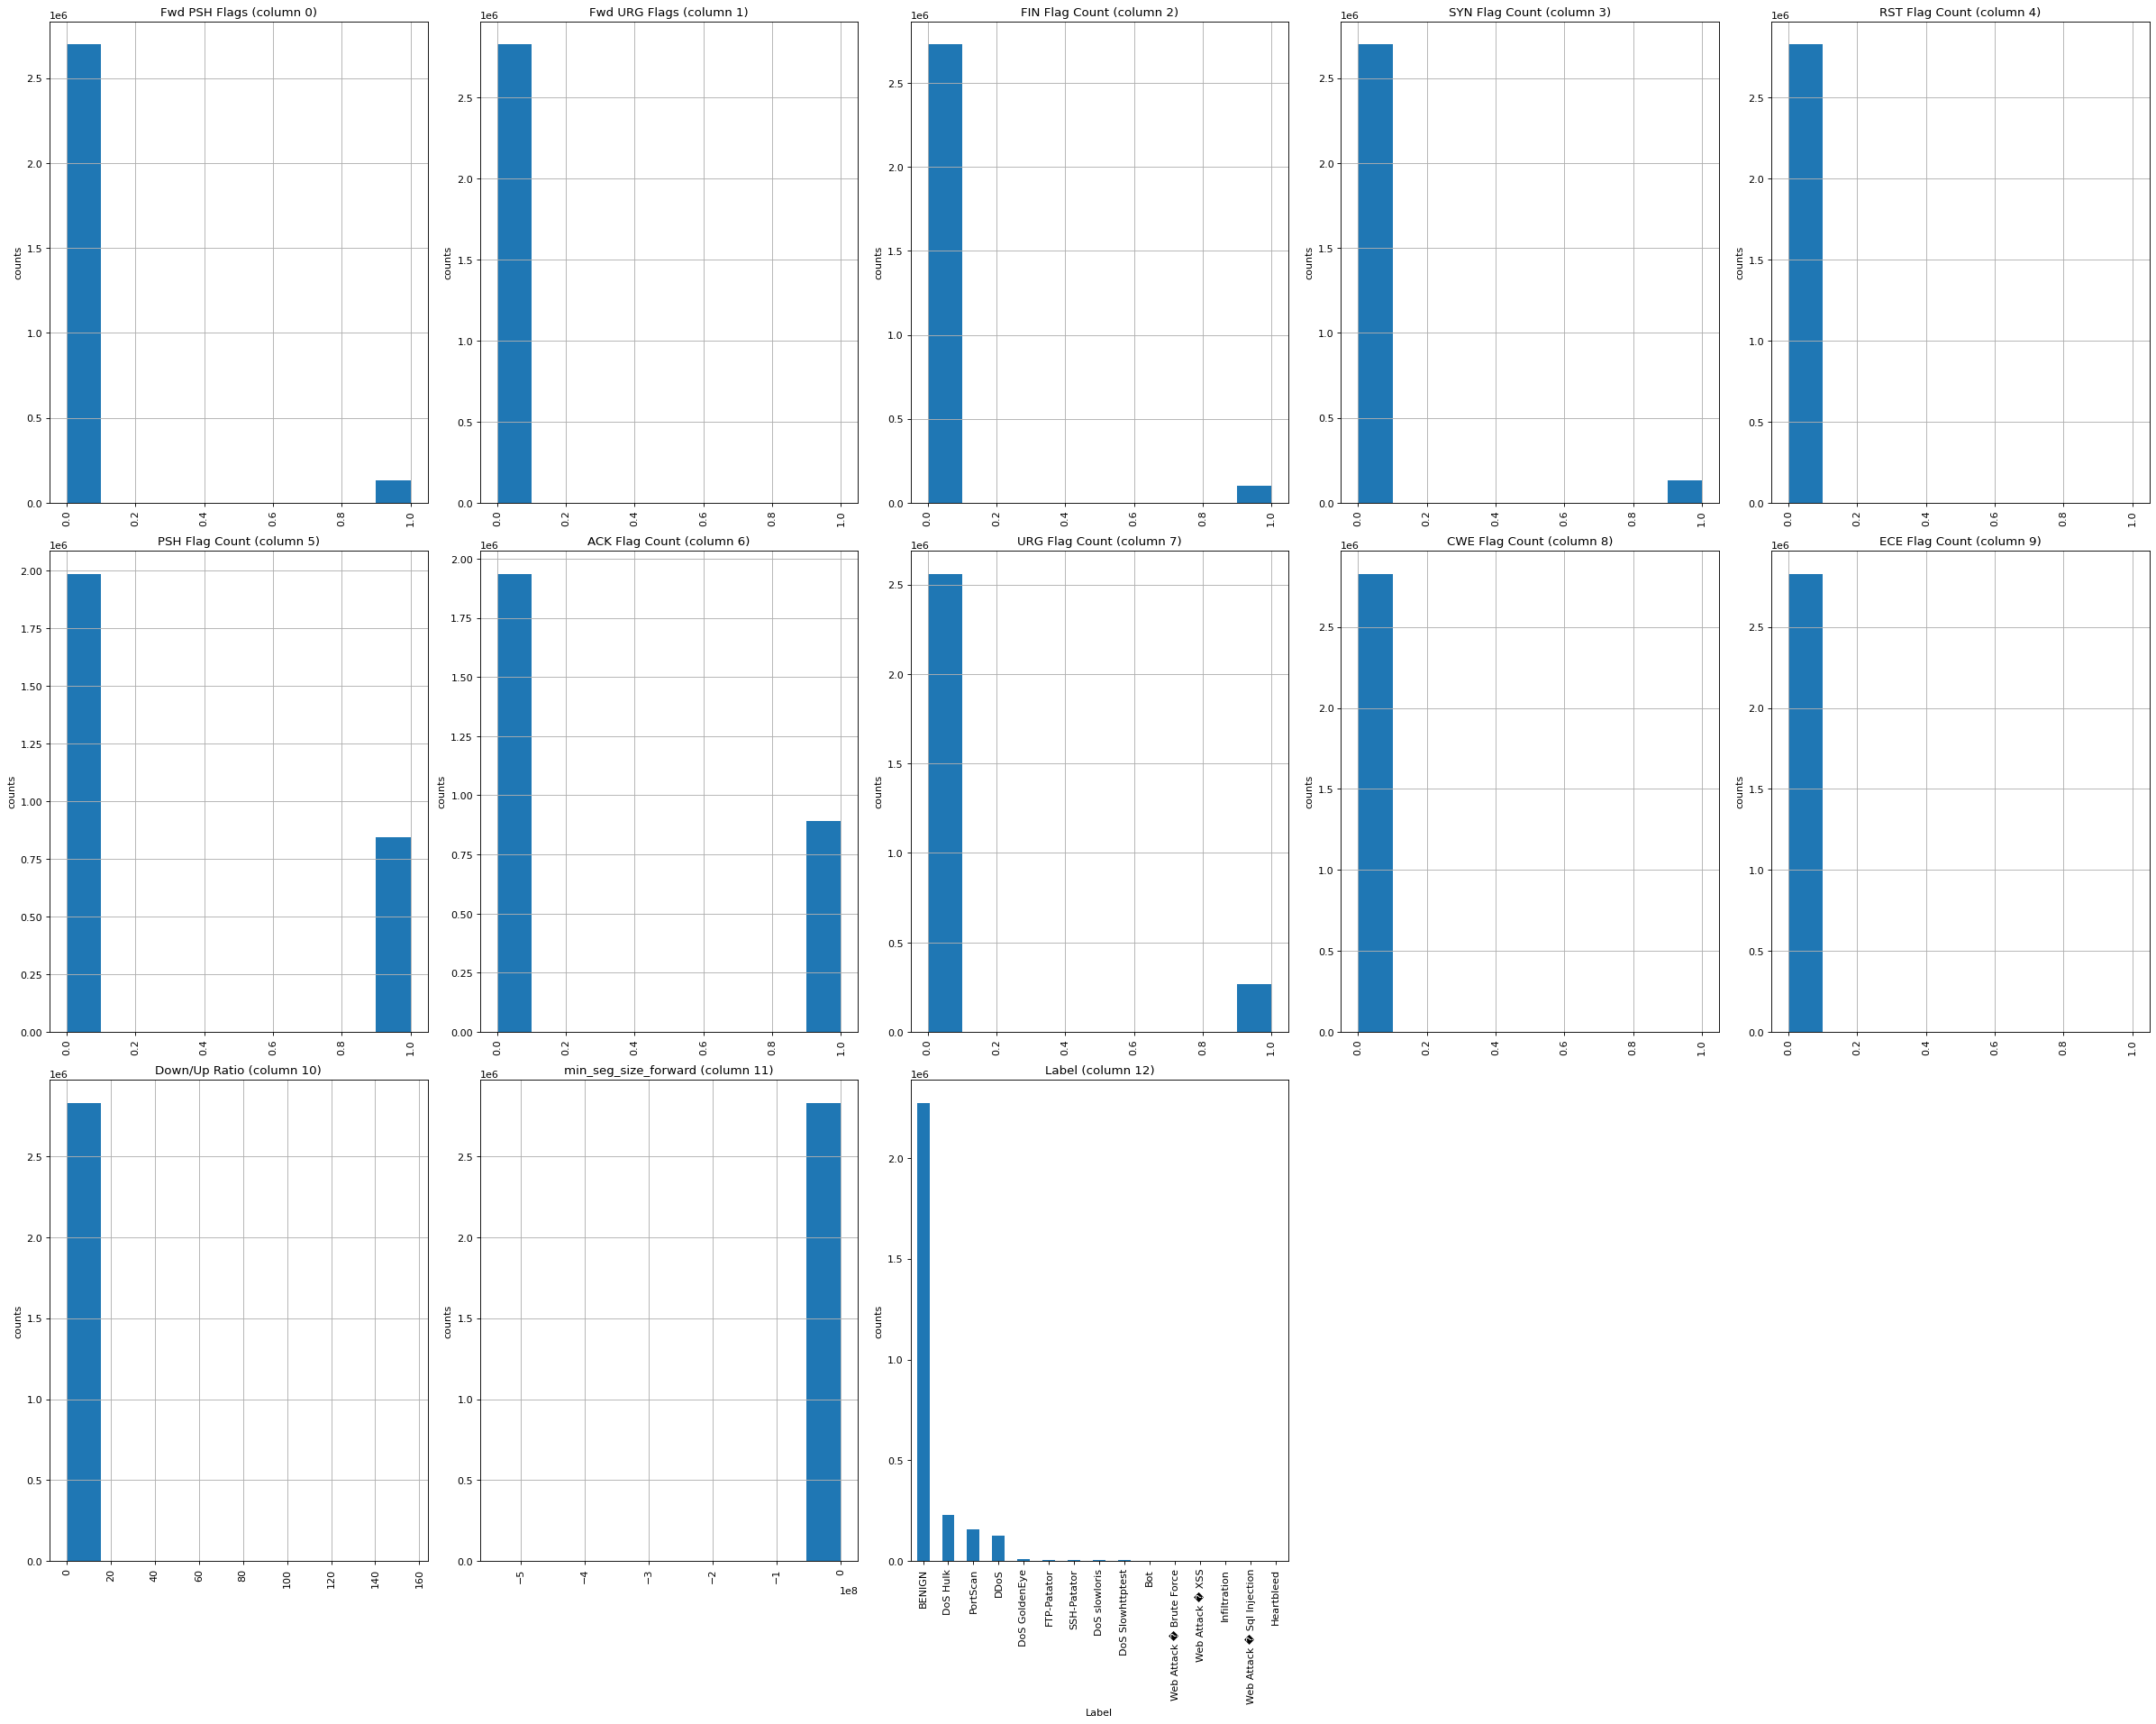

In [ ]:
plt.rcParams['figure.figsize']=(30,30)
plot_per_column_distribution(df, 79, 5)


## plot the bar graph


In [ ]:
def bar_graph(feature):
  df[feature].value_counts().plot(kind="bar")


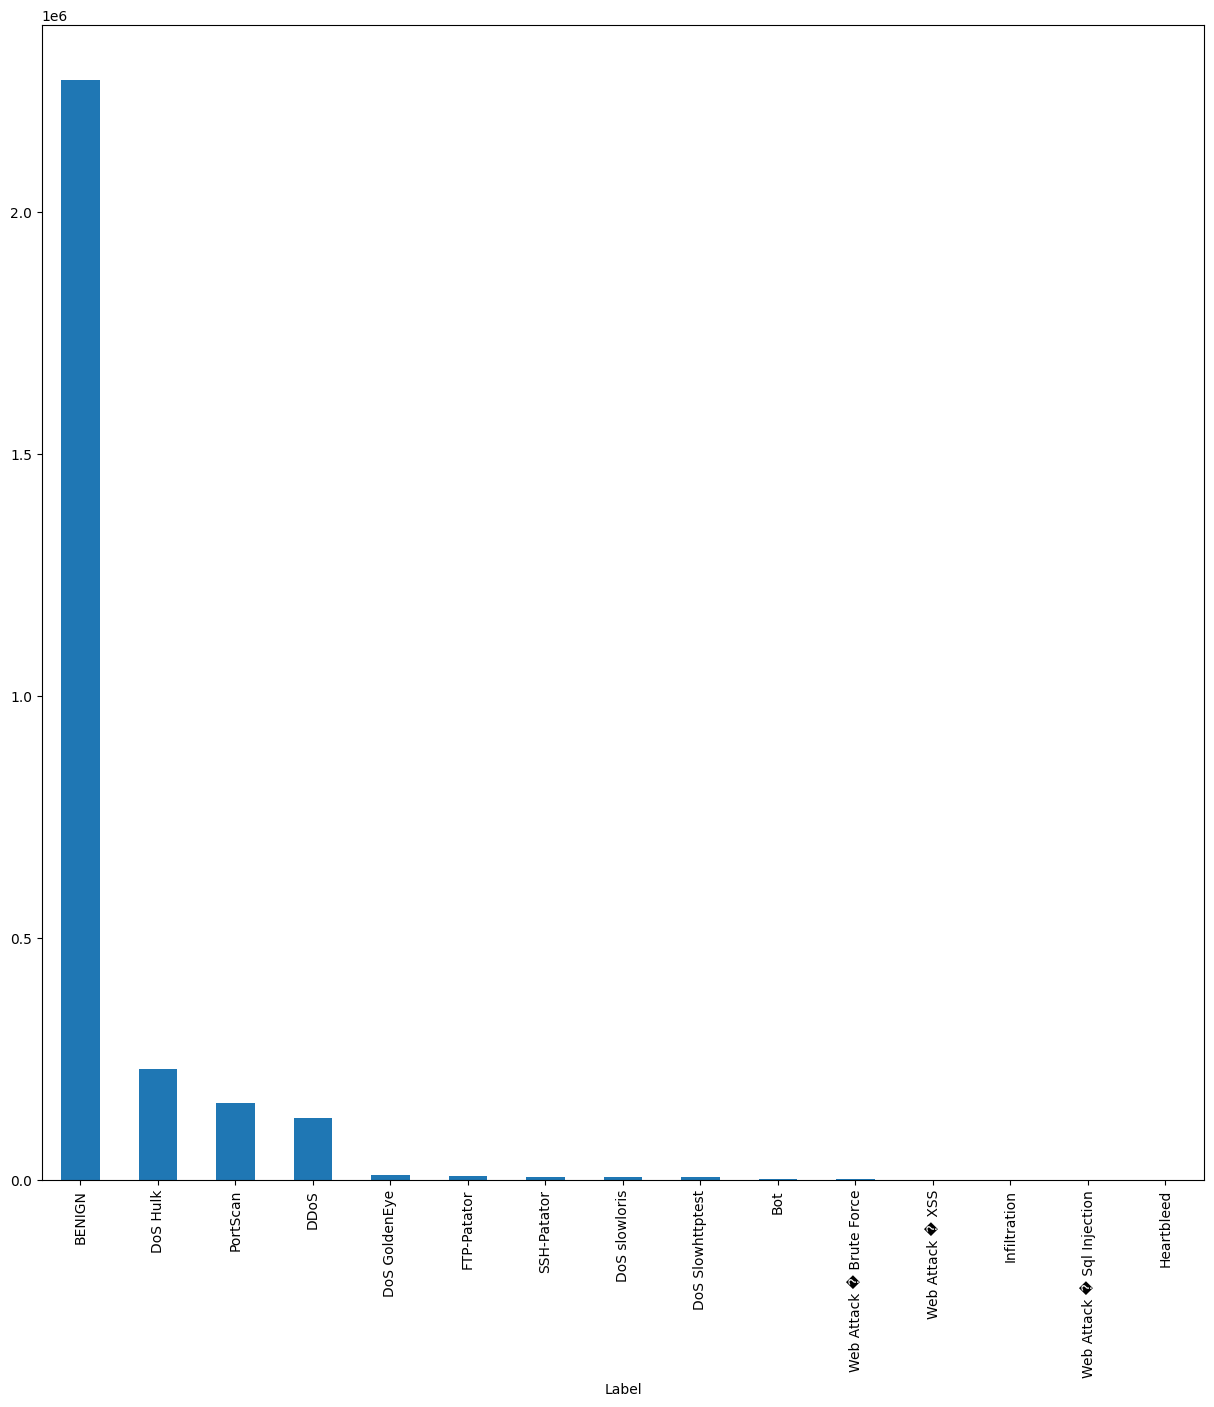

In [ ]:
plt.rcParams['figure.figsize']=(15,15)
bar_graph("Label")

/tmp/ipython-input-425537385.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p=sns.distplot(a=df['Flow Duration'])


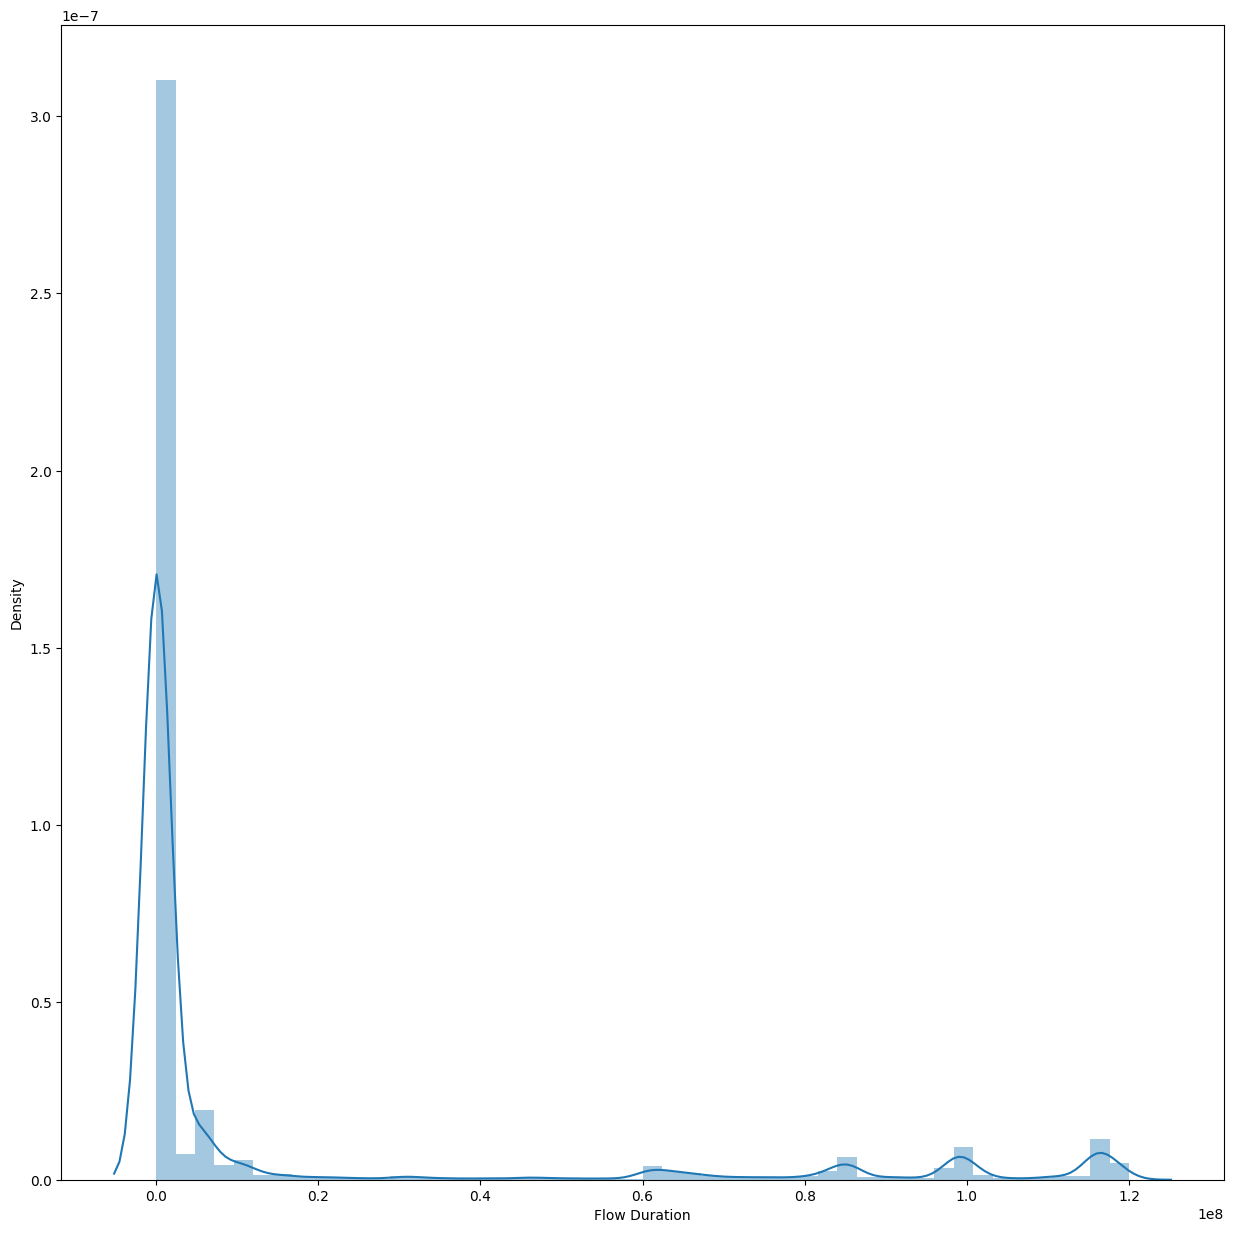

In [ ]:
import seaborn as sns
p=sns.distplot(a=df['Flow Duration'])
plt.show()

## plotting the piechart


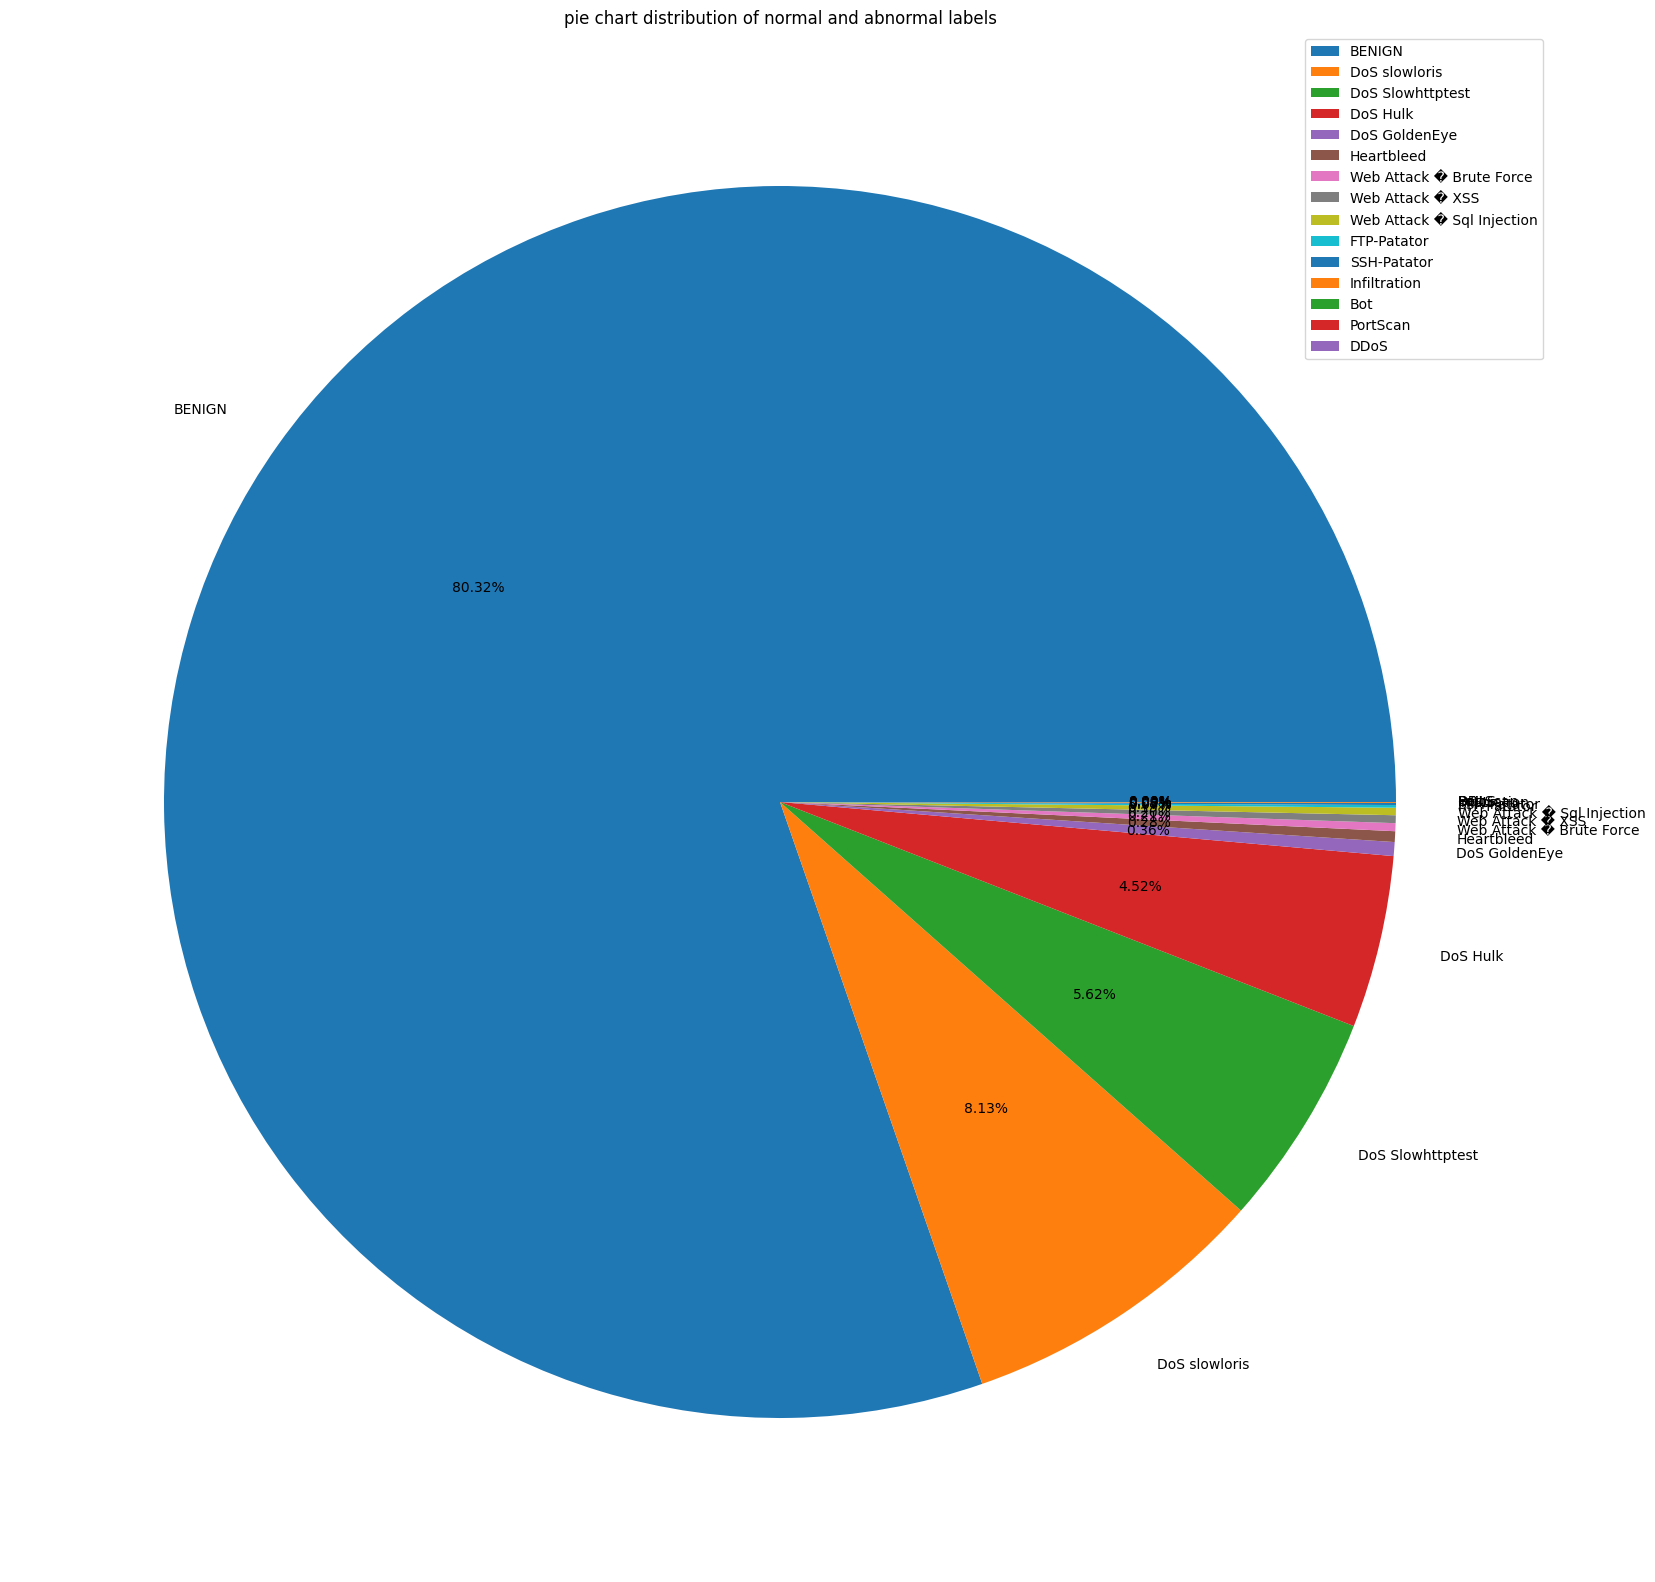

In [ ]:
plt.figure(figsize=(20,20))
plt.pie(df['Label'].value_counts(),labels=df['Label'].unique(),autopct="%0.2f%%")
plt.title("pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

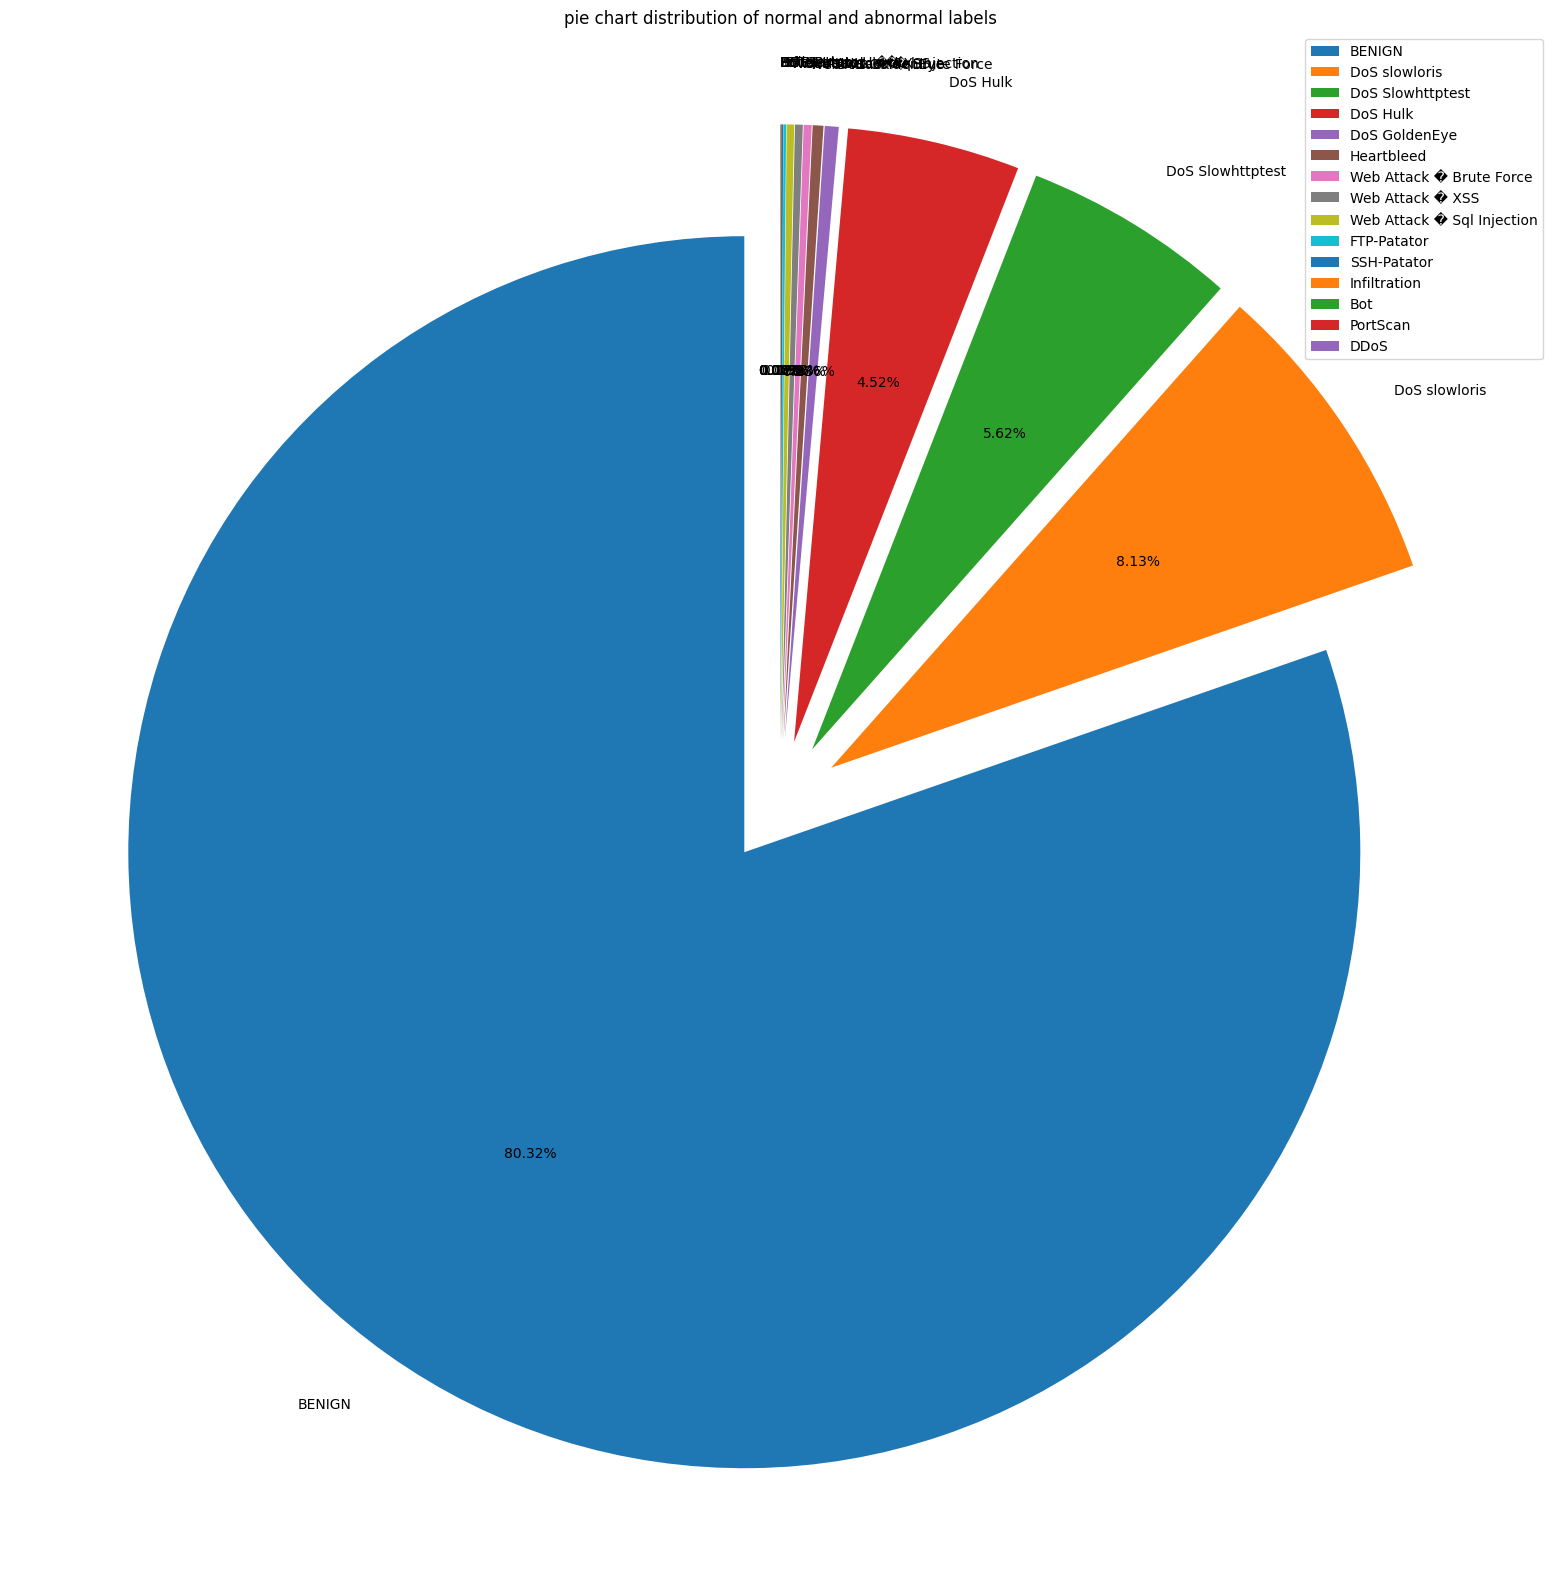

In [ ]:
import matplotlib.pyplot as plt
#increase the figure size

plt.figure(figsize=(20,20))
#piechart distribution of normal and abnormal labels
labels=df['Label'].unique()
sizes=df['Label'].value_counts()
explode=(0.1,)*len(labels)#exploide all the slices slightly
plt.pie(sizes,labels=labels,autopct="%0.2f%%",explode=explode,startangle=90)
plt.title("pie chart distribution of normal and abnormal labels")
plt.legend(labels,loc='best')
plt.show()

In [ ]:
df.replace([np.inf,-np.inf],np.nan,inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


In [ ]:
df.shape

(2520798, 79)

In [ ]:
import pandas as pd
#assuming df is your datafram with the given dataset
#create a list of classes you want to keep all records for
classes_to_keep = ['DoS GoldenEye','FTP-Patator','DoS slowloris','DoS Slowhttptest',
                   'Bot','SSH-Patator','Web Attack � Brute Force','Web Attack � XSS',
                   'Infiltration','Web Attack � Sql Injection','Heartbleed']

#create  a list of classes you want to limit to 100000 records
classes_to_limit=['BENIGN','DoS Hulk','PortScan','DDoS']
#filter rows for classes to keep all records
df_keep=df[df['Label'].isin(classes_to_keep)]
#filter rows for classes to keep all records
df_limit=df[df['Label'].isin(classes_to_limit)].groupby("Label").head(50000)
#combine the filtered rows
result_df=pd.concat([df_keep,df_limit])
#shuffle the resulting dataframe to mix the classes
result_df=result_df.sample(frac=1,random_state=42).reset_index(drop=True)

In [ ]:
result_df.shape

(234187, 79)

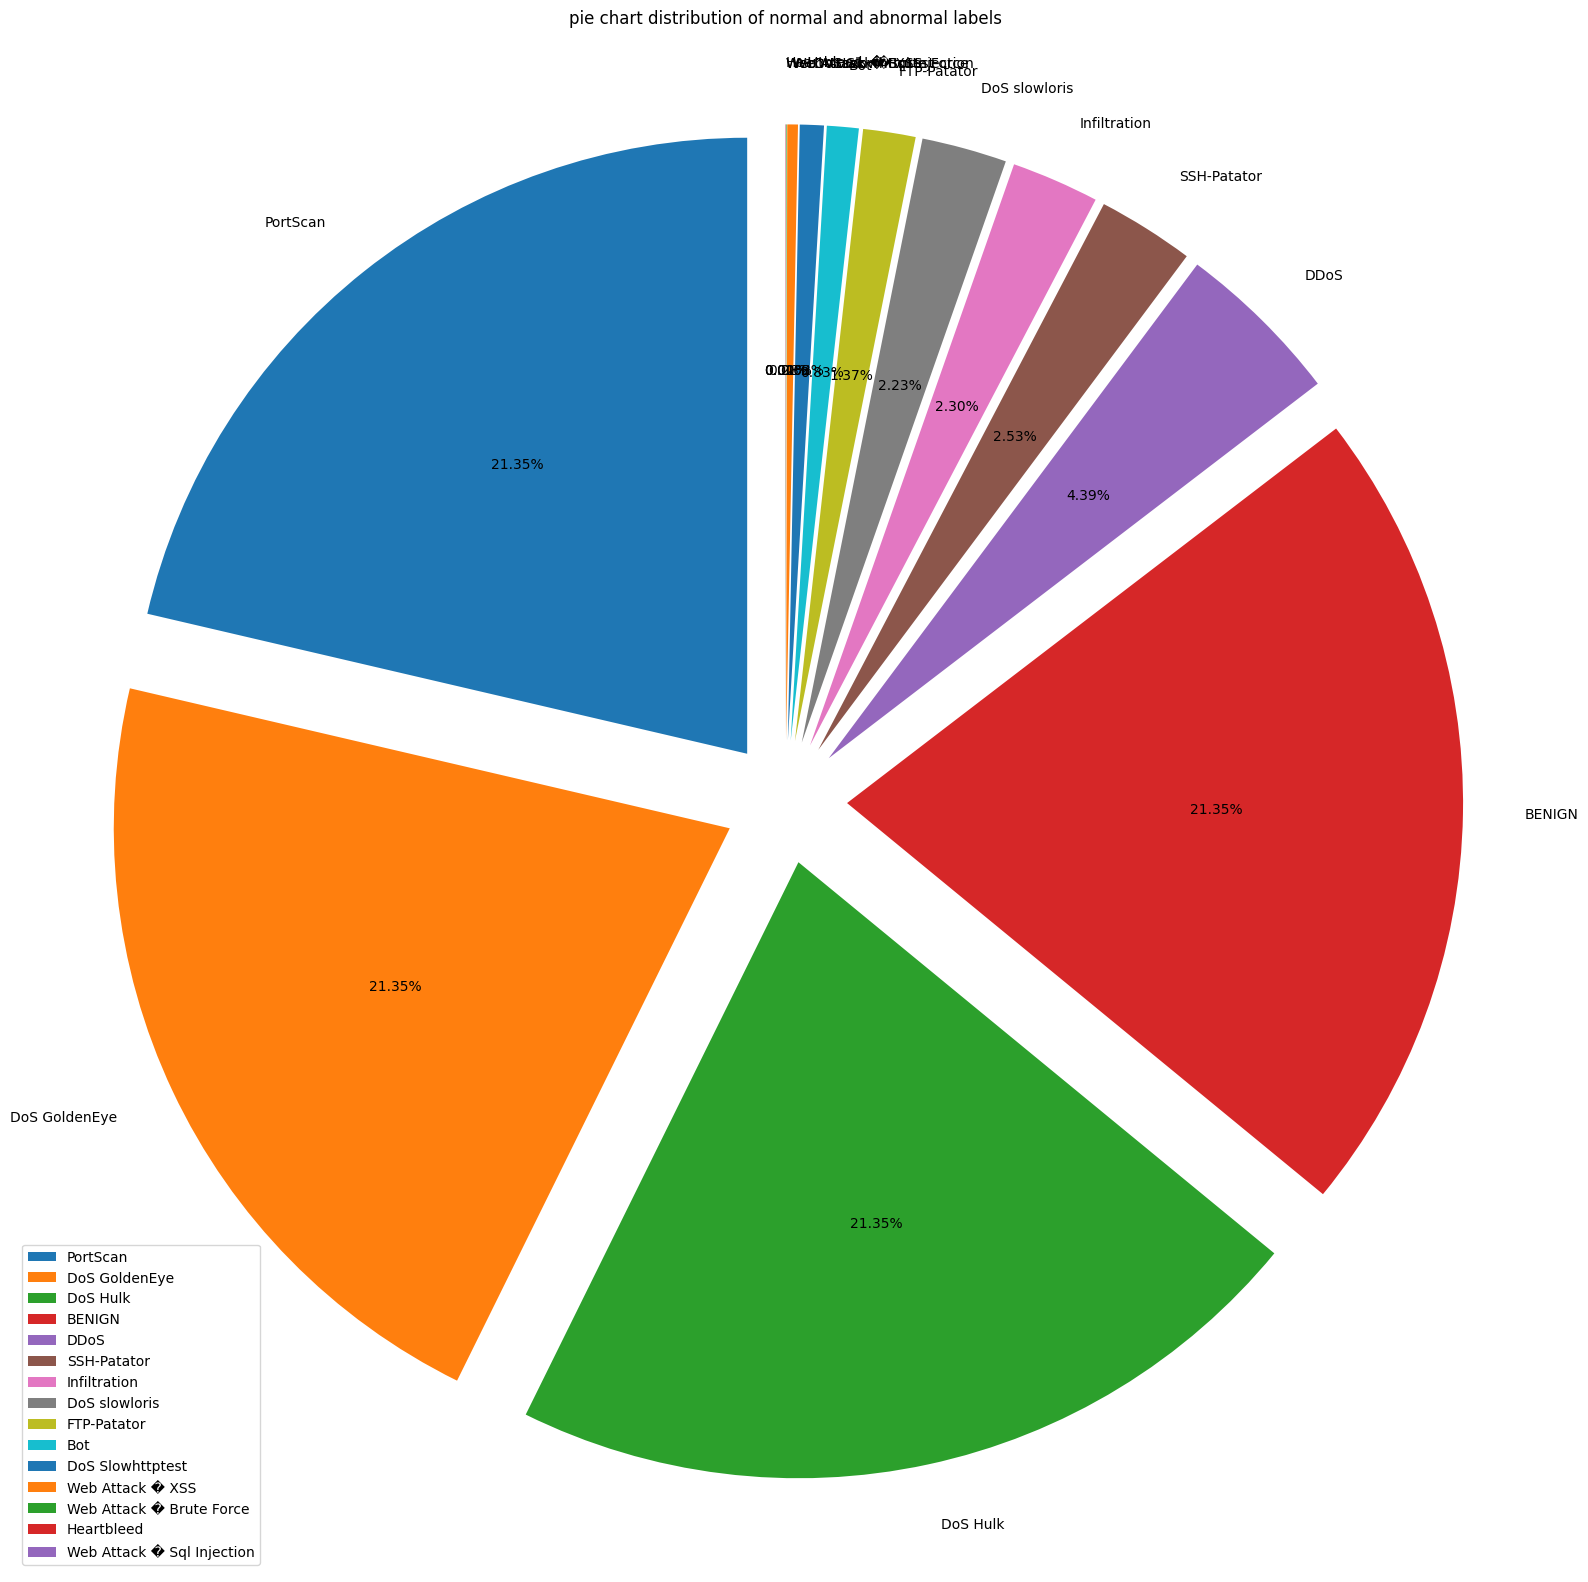

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
#pie chart distribution of normal and abnormal labels
labels=result_df['Label'].unique()
sizes=result_df['Label'].value_counts()
explode=(0.1,)*len(labels)#explode all slieces slightly
plt.pie(sizes,labels=labels,autopct="%0.2f%%",explode=explode,startangle=90)
plt.title("pie chart distribution of normal and abnormal labels")
plt.legend(labels,loc='best')
plt.show()

## Label encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder

#make acopy of your dataframe
df_encoded=result_df.copy()
#create alabel encoder object
le=LabelEncoder()
#fit and transform the label column and assign the transformed values to a new column
df_encoded['Label']=le.fit_transform(result_df['Label'])
#print the mapping of original labels to encoded values
label_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
print(label_mapping)
#display the modified dataframe
print("\n Encoded datarame:")
df_encoded.head()

{'BENIGN': np.int64(0), 'Bot': np.int64(1), 'DDoS': np.int64(2), 'DoS GoldenEye': np.int64(3), 'DoS Hulk': np.int64(4), 'DoS Slowhttptest': np.int64(5), 'DoS slowloris': np.int64(6), 'FTP-Patator': np.int64(7), 'Heartbleed': np.int64(8), 'Infiltration': np.int64(9), 'PortScan': np.int64(10), 'SSH-Patator': np.int64(11), 'Web Attack � Brute Force': np.int64(12), 'Web Attack � Sql Injection': np.int64(13), 'Web Attack � XSS': np.int64(14)}

 Encoded datarame:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,10243,54,1,1,2,6,2,2,2.000000,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,10
1,80,5002839,8,6,439,11632,439,0,54.875000,155.209938,...,32,0.0,0.0,0,0,0.0,0.0,0,0,3
2,80,97512230,7,5,397,11595,397,0,56.714286,150.051896,...,32,538.0,0.0,538,538,97500000.0,0.0,97500000,97500000,4
3,3945,43,1,1,2,6,2,2,2.000000,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,10
4,443,107164673,9,8,617,5358,249,0,68.555556,100.437930,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [ ]:
import joblib
#save the label encoder to file
encoder_file_path='label_encoder.pkl'
joblib.dump(le,encoder_file_path)

['label_encoder.pkl']

## making correlation matrix

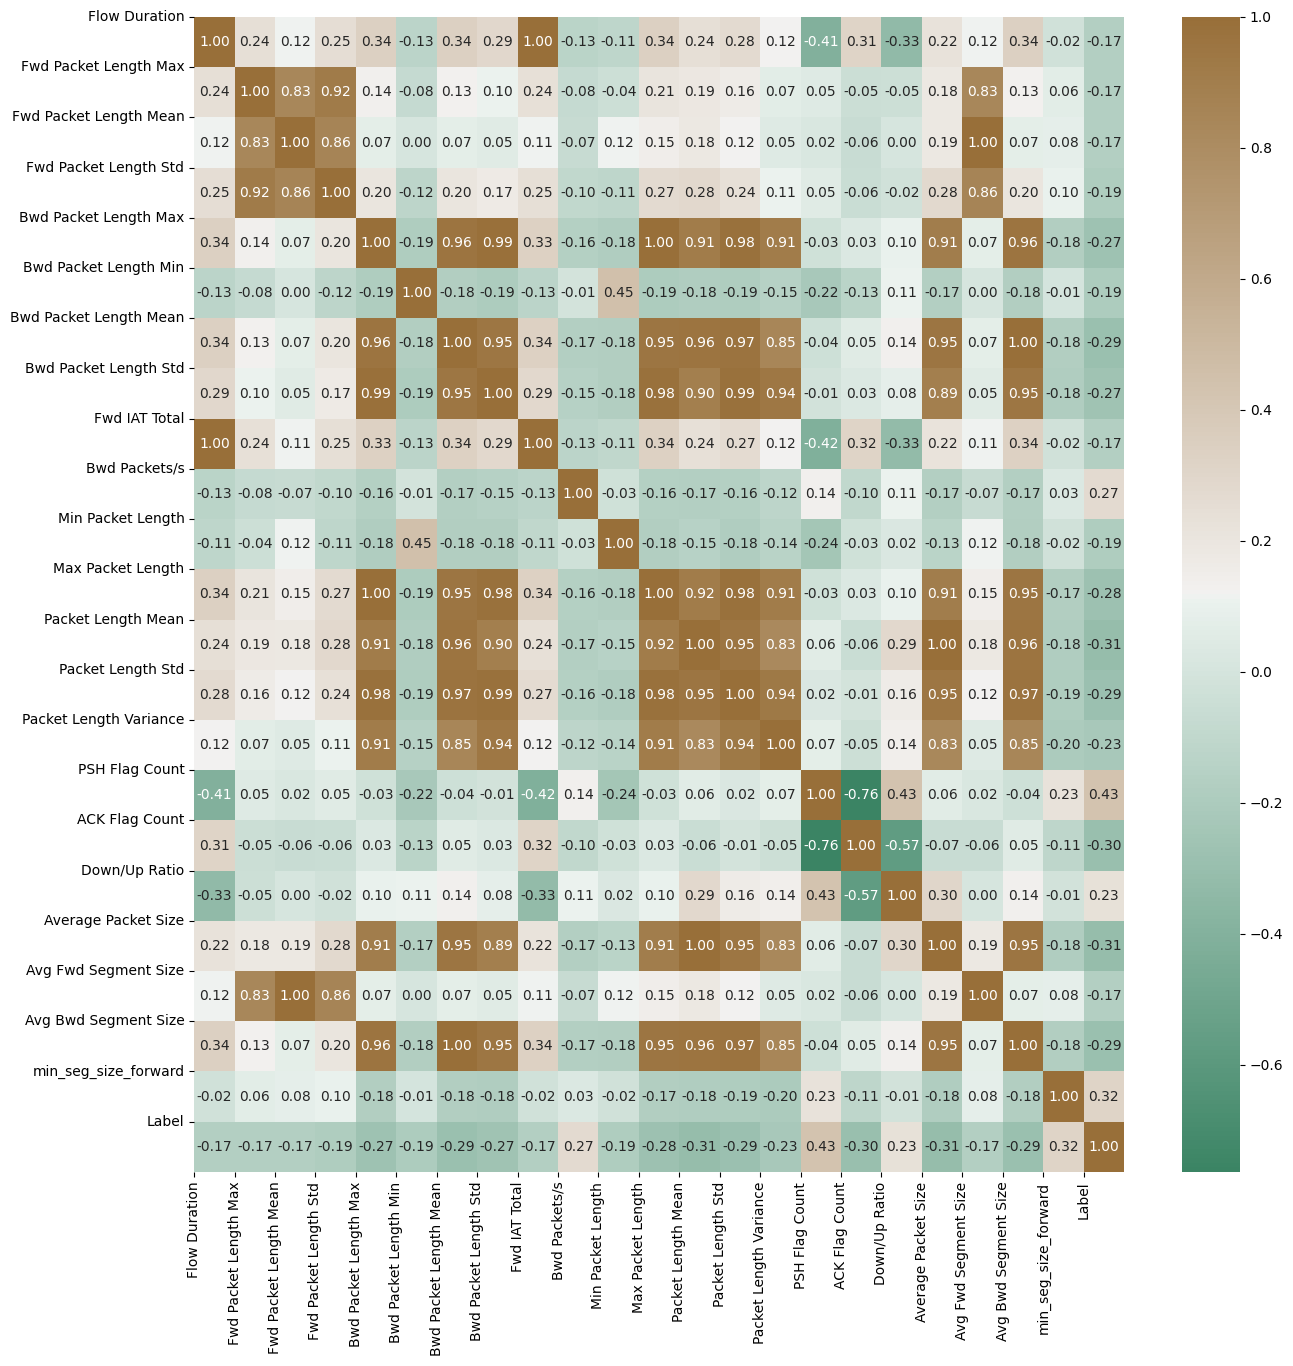

In [ ]:
import seaborn as sns
#set the correlation threshold
correlation_threshold=0.15
#calulate the correlation matrix
corr=df_encoded.corr()
#filter column based on the correlation threshold
columns_to_include=corr.columns[abs(corr['Label'])>=correlation_threshold]
filtered_corr=corr.loc[columns_to_include,columns_to_include]
#plot the filtered correlation heatmap
fig,ax=plt.subplots(figsize=(15,15))
colormap=sns.diverging_palette(150,50,as_cmap=True)
sns.heatmap(filtered_corr,cmap=colormap,annot=True,fmt=".2f")
plt.xticks(range(len(filtered_corr.columns)),filtered_corr.columns)
plt.yticks(range(len(filtered_corr.columns)),filtered_corr.columns)
plt.show()


In [ ]:
#split your data into X and Y
X=df_encoded.drop('Label',axis=1)
y=df_encoded['Label']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import pandas as pd

#split the data into trainng and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#initialize random forest classifier
rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42)

#fit the model to the training data
rf_classifier.fit(X_train,y_train)

#get feature importances
feature_importances=rf_classifier.feature_importances_

#create dataframe with feature with names and their importances
feature_importance_df=pd.DataFrame({'Feature':X.columns,'Importance':feature_importances})

#sort the dataframe by importance in decending order
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)

#select the top 20 features
top_features=feature_importance_df.head(20)['Feature'].tolist()

#filter your original dataframe to include only top 20 features
df_top_features=df_encoded[top_features+['Label']]

#display the dataframe with top features
df_top_features.head()


,Fwd Packet Length Max,Fwd Packet Length Mean,Bwd Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Flow Packets/s,Packet Length Std,Flow IAT Mean,Avg Fwd Segment Size,Flow IAT Max,...,Avg Bwd Segment Size,Bwd Packet Length Mean,Flow Duration,Bwd Packet Length Std,Bwd Packet Length Max,Subflow Bwd Bytes,Total Length of Bwd Packets,Destination Port,Packet Length Variance,Label
0,2,2.000000,18518.518520,2,2,37037.037040,2.309401,5.400000e+01,2.000000,54,...,6.000000,6.000000,54,0.000000,6,6,6,10243,5.333333e+00,10
1,439,54.875000,1.199319,439,439,2.798411,1801.039718,3.848338e+05,54.875000,5000031,...,1938.666667,1938.666667,5002839,2544.918912,5792,11632,11632,80,3.243744e+06,3
2,397,56.714286,0.051276,397,397,0.123061,2797.778452,8.864748e+06,56.714286,97500000,...,2319.000000,2319.000000,97512230,4414.366206,10136,11595,11595,80,7.827564e+06,4
3,2,2.000000,23255.813950,2,2,46511.627910,2.309401,4.300000e+01,2.000000,43,...,6.000000,6.000000,43,0.000000,6,6,6,3945,5.333333e+00,10
4,249,68.555556,0.074651,617,617,0.158634,508.378561,6.697792e+06,68.555556,107000000,...,669.750000,669.750000,107164673,617.075534,1460,5358,5358,443,2.584488e+05,0


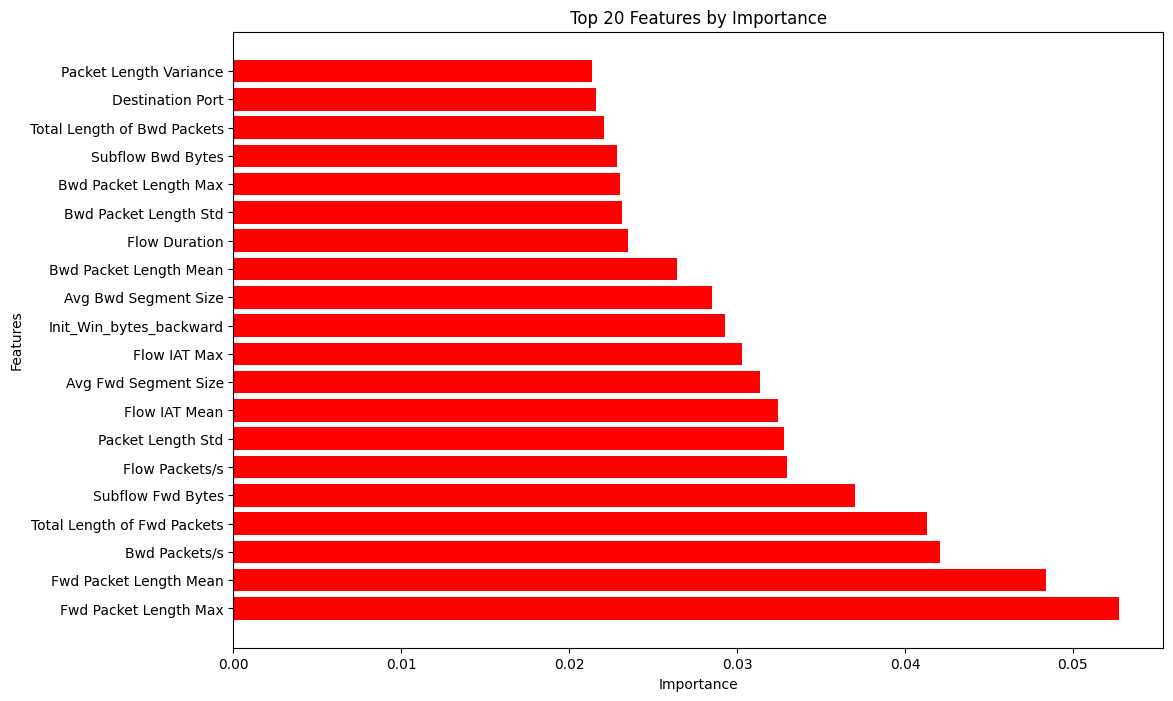

In [ ]:
import matplotlib.pyplot as plt
#create a bar plot of the top 20 features and their importances
plt.figure(figsize=(12,8))
plt.barh(top_features,feature_importance_df.head(20)['Importance'],color='red')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Features by Importance')
plt.show()

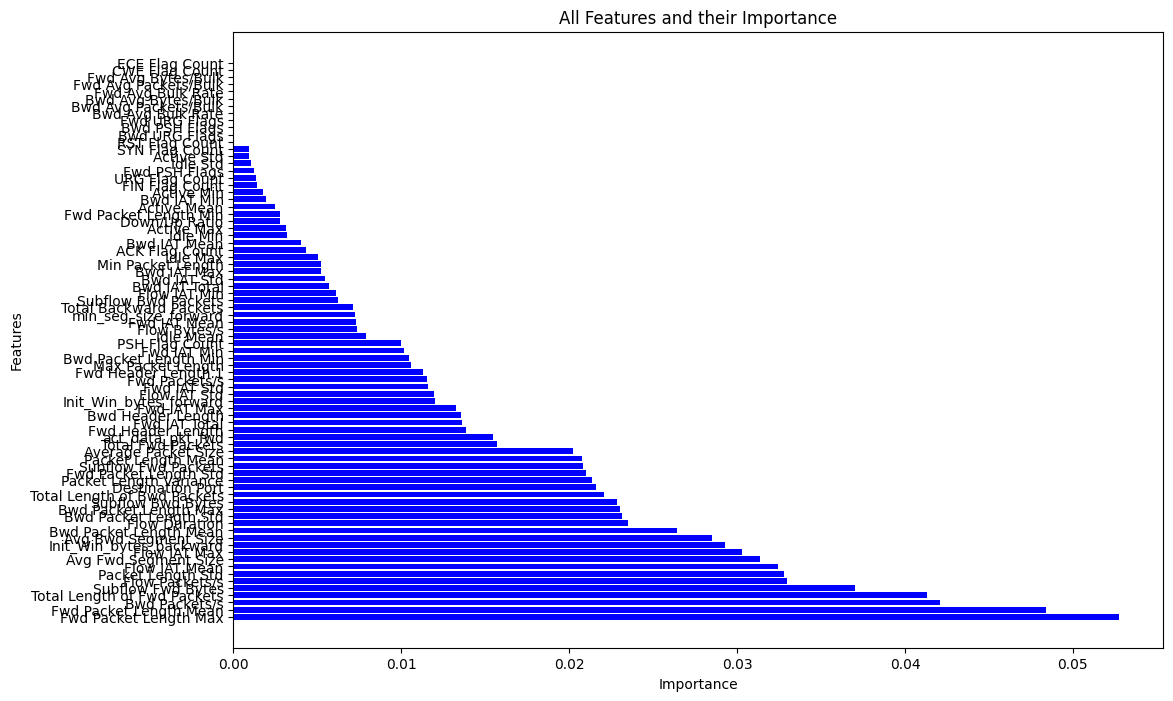

In [ ]:
import matplotlib.pyplot as plt
#assumming feature_importance-df is the datafram with feature importances
#sort the dataframe by importance in  decending order
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)

#create bar plot of all the features and their importance
plt.figure(figsize=(12,8))
plt.barh(feature_importance_df['Feature'],feature_importance_df['Importance'],color="blue")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('All Features and their Importance')
plt.show()

In [ ]:
df_top_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234187 entries, 0 to 234186
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Fwd Packet Length Max        234187 non-null  int64  
 1   Fwd Packet Length Mean       234187 non-null  float64
 2   Bwd Packets/s                234187 non-null  float64
 3   Total Length of Fwd Packets  234187 non-null  int64  
 4   Subflow Fwd Bytes            234187 non-null  int64  
 5   Flow Packets/s               234187 non-null  float64
 6   Packet Length Std            234187 non-null  float64
 7   Flow IAT Mean                234187 non-null  float64
 8   Avg Fwd Segment Size         234187 non-null  float64
 9   Flow IAT Max                 234187 non-null  int64  
 10  Init_Win_bytes_backward      234187 non-null  int64  
 11  Avg Bwd Segment Size         234187 non-null  float64
 12  Bwd Packet Length Mean       234187 non-null  float64
 13 

In [ ]:
#assumming the label is the target variable
X_top_features=df_top_features.drop(['Label'],axis=1)
y_top_features=df_top_features['Label']

#split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X_top_features,y_top_features,test_size=0.2,random_state=42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187349 entries, 63072 to 121958
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Fwd Packet Length Max        187349 non-null  int64  
 1   Fwd Packet Length Mean       187349 non-null  float64
 2   Bwd Packets/s                187349 non-null  float64
 3   Total Length of Fwd Packets  187349 non-null  int64  
 4   Subflow Fwd Bytes            187349 non-null  int64  
 5   Flow Packets/s               187349 non-null  float64
 6   Packet Length Std            187349 non-null  float64
 7   Flow IAT Mean                187349 non-null  float64
 8   Avg Fwd Segment Size         187349 non-null  float64
 9   Flow IAT Max                 187349 non-null  int64  
 10  Init_Win_bytes_backward      187349 non-null  int64  
 11  Avg Bwd Segment Size         187349 non-null  float64
 12  Bwd Packet Length Mean       187349 non-null  float64
 13  

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46838 entries, 152992 to 171207
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Fwd Packet Length Max        46838 non-null  int64  
 1   Fwd Packet Length Mean       46838 non-null  float64
 2   Bwd Packets/s                46838 non-null  float64
 3   Total Length of Fwd Packets  46838 non-null  int64  
 4   Subflow Fwd Bytes            46838 non-null  int64  
 5   Flow Packets/s               46838 non-null  float64
 6   Packet Length Std            46838 non-null  float64
 7   Flow IAT Mean                46838 non-null  float64
 8   Avg Fwd Segment Size         46838 non-null  float64
 9   Flow IAT Max                 46838 non-null  int64  
 10  Init_Win_bytes_backward      46838 non-null  int64  
 11  Avg Bwd Segment Size         46838 non-null  float64
 12  Bwd Packet Length Mean       46838 non-null  float64
 13  Flow Duration  

## Storing the top features

In [ ]:
X_top_features.to_csv('X_top_features.csv',index=False)
y_top_features.to_csv('y_top_features.csv',index=False)

In [ ]:
print("Infinity values in X_train:",np.any(np.isinf(X_train)))
print("NaN values in X_train:",np.any(np.isnan(X_train)))
print("Infinity values in X_test:",np.any(np.isinf(X_test)))
print("NaN values in X_test:",np.any(np.isnan(X_test)))

Infinity values in X_train: False
NaN values in X_train: False
Infinity values in X_test: False
NaN values in X_test: False


In [ ]:
# #from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# X_train_scaled=scaler.fit_transform(X_train)
# X_test_scaled=scaler.transform(X_test)

In [ ]:
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:

def print_all_accuracy_metric(algorithm,name):
  #computing the accuracy ,f1score,precision and recall of the model performance
  #predicting the target value from the model of the samples
  y_train_log=algorithm.predict(X_train)
  y_test_log=algorithm.predict(X_test)
  acc_train_log=metrics.accuracy_score(y_train,y_train_log)

  acc_test_log=metrics.accuracy_score(y_test,y_test_log)
  print(name,": Accuracy on training Data:{:.3f}".format(acc_train_log))
  print(name,": Accuracy on test data:{:.3f}".format(acc_test_log))
  print()

  f1_score_train_log=metrics.f1_score(y_train,y_train_log,average='macro')
  f1_score_test_log=metrics.f1_score(y_test,y_test_log,average='macro')
  print(name,": F1 score on training data:{:.3f}".format(f1_score_train_log))
  print(name,": F1 score on test data:{:.3f}".format(f1_score_test_log))
  print()

  recall_score_train_log=metrics.recall_score(y_train,y_train_log,average='macro')
  recall_score_test_log=metrics.recall_score(y_test,y_test_log,average='macro')
  print(name,": Recall score on training data:{:.3f}".format(recall_score_train_log))
  print(name,": Recall score on test data:{:.3f}".format(recall_score_test_log))
  print()

  precision_score_train_log=metrics.precision_score(y_train,y_train_log,average='macro')
  precision_score_test_log=metrics.precision_score(y_test,y_test_log,average='macro')
  print(name,": Precision score on training data:{:.3f}".format(precision_score_train_log))
  print(name,": precision socre on test dat:{:.3f}".format(precision_score_test_log))
  print()

  print("\n\n Classification Report \n\n")
  print(metrics.classification_report(y_test,y_test_log))
  print("\n\n")

# Machine Learning

 ## 1.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clfd=DecisionTreeClassifier(criterion='entropy',max_depth=4)
clfd.fit(X_train,y_train)

print_all_accuracy_metric(clfd,"DecisionTreeClassifier")
#save the model using joblib
joblib.dump(clfd,'DecisionTreeClassifier.joblib')

DecisionTreeClassifier : Accuracy on training Data:0.923
DecisionTreeClassifier : Accuracy on test data:0.921

DecisionTreeClassifier : F1 score on training data:0.494
DecisionTreeClassifier : F1 score on test data:0.493

DecisionTreeClassifier : Recall score on training data:0.483
DecisionTreeClassifier : Recall score on test data:0.482

DecisionTreeClassifier : Precision score on training data:0.535
DecisionTreeClassifier : precision socre on test dat:0.533



 Classification Report 


              precision    recall  f1-score   support

           0       0.77      0.98      0.86      9962
           1       0.00      0.00      0.00       396
           2       0.99      1.00      1.00      9896
           3       0.98      0.67      0.80      2075
           4       1.00      0.96      0.98     10067
           5       0.51      0.57      0.54      1098
           6       0.74      0.18      0.29      1072
           7       1.00      0.97      0.98      1210
           8       0

['DecisionTreeClassifier.joblib']

## 2. SVM(Support vector machine)

In [ ]:
# from sklearn.svm import SVC
# #create the SVM model
# svm_model=SVC(kernel='linear',C=1.0)

# #fit the model in the training data
# svm_model.fit(X_train,y_train)

# print_all_accuracy_metric(svm_model,'SVM')
# #save the model using joblib
# joblib.dump(svm_model,'SVM.joblib')

## 3. RandomForestClassifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)
print_all_accuracy_metric(rf_clf,'RandomForestClassifier')
#save the model using joblib
joblib.dump(rf_clf,'RandomForestClassifier.joblib')

RandomForestClassifier : Accuracy on training Data:1.000
RandomForestClassifier : Accuracy on test data:0.994

RandomForestClassifier : F1 score on training data:0.995
RandomForestClassifier : F1 score on test data:0.874

RandomForestClassifier : Recall score on training data:0.991
RandomForestClassifier : Recall score on test data:0.865

RandomForestClassifier : Precision score on training data:1.000
RandomForestClassifier : precision socre on test dat:0.887



 Classification Report 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9962
           1       1.00      1.00      1.00       396
           2       1.00      1.00      1.00      9896
           3       1.00      1.00      1.00      2075
           4       1.00      1.00      1.00     10067
           5       1.00      0.99      1.00      1098
           6       0.99      1.00      0.99      1072
           7       1.00      1.00      1.00      1210
           8       1

['RandomForestClassifier.joblib']

## 3.KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,y_train)
# make the prediction on the test set
y_pred=knn_clf.predict(X_test)
print_all_accuracy_metric(knn_clf,'KNeighborsClassifier')

#save the model using jolib
joblib.dump(knn_clf,'KneighborsClassifier.joblib')

KNeighborsClassifier : Accuracy on training Data:0.985
KNeighborsClassifier : Accuracy on test data:0.980

KNeighborsClassifier : F1 score on training data:0.840
KNeighborsClassifier : F1 score on test data:0.824

KNeighborsClassifier : Recall score on training data:0.823
KNeighborsClassifier : Recall score on test data:0.820

KNeighborsClassifier : Precision score on training data:0.916
KNeighborsClassifier : precision socre on test dat:0.894



 Classification Report 


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      9962
           1       0.95      0.86      0.90       396
           2       0.98      0.99      0.99      9896
           3       0.98      0.99      0.99      2075
           4       0.99      0.99      0.99     10067
           5       0.98      0.99      0.99      1098
           6       0.97      0.95      0.96      1072
           7       0.99      0.98      0.98      1210
           8       0.50      1.00   

['KneighborsClassifier.joblib']

## 4.Naive Bayes


In [ ]:
# Naive Bayes classifier model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
nb=GaussianNB()
#fit the model
nb.fit(X_train,y_train)
print_all_accuracy_metric(nb,'Naive Bayes')
joblib.dump(nb,'GaussianNB.joblib')

Naive Bayes : Accuracy on training Data:0.443
Naive Bayes : Accuracy on test data:0.442

Naive Bayes : F1 score on training data:0.338
Naive Bayes : F1 score on test data:0.336

Naive Bayes : Recall score on training data:0.484
Naive Bayes : Recall score on test data:0.465

Naive Bayes : Precision score on training data:0.380
Naive Bayes : precision socre on test dat:0.383



 Classification Report 


              precision    recall  f1-score   support

           0       0.97      0.08      0.14      9962
           1       0.08      0.03      0.04       396
           2       0.55      0.50      0.53      9896
           3       0.32      0.28      0.30      2075
           4       0.80      0.68      0.73     10067
           5       0.09      0.02      0.03      1098
           6       0.14      0.59      0.23      1072
           7       0.11      1.00      0.20      1210
           8       1.00      1.00      1.00         2
           9       0.05      0.33      0.08         6


['GaussianNB.joblib']

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.6 MB/s eta 0:00:00


## 5 catboost

In [ ]:
import catboost
from catboost import CatBoostClassifier
catboost_model=CatBoostClassifier(iterations=10,learning_rate=0.1,depth=6)
catboost_model.fit(X_train,y_train)
print_all_accuracy_metric(catboost_model,'CatBoostClassifier')
joblib.dump(catboost_model,'CatBoostClassifier.joblib')

0:	learn: 1.6514740	total: 835ms	remaining: 7.51s
1:	learn: 1.3452475	total: 1.66s	remaining: 6.65s
2:	learn: 1.1512958	total: 2.48s	remaining: 5.79s
3:	learn: 1.0098202	total: 3.28s	remaining: 4.92s
4:	learn: 0.8920503	total: 4.1s	remaining: 4.1s
5:	learn: 0.7978359	total: 4.92s	remaining: 3.28s
6:	learn: 0.7167041	total: 5.74s	remaining: 2.46s
7:	learn: 0.6500264	total: 6.55s	remaining: 1.64s
8:	learn: 0.5887920	total: 7.38s	remaining: 820ms
9:	learn: 0.5384558	total: 8.5s	remaining: 0us
CatBoostClassifier : Accuracy on training Data:0.942
CatBoostClassifier : Accuracy on test data:0.941

CatBoostClassifier : F1 score on training data:0.563
CatBoostClassifier : F1 score on test data:0.560

CatBoostClassifier : Recall score on training data:0.551
CatBoostClassifier : Recall score on test data:0.548

CatBoostClassifier : Precision score on training data:0.595
CatBoostClassifier : precision socre on test dat:0.593



 Classification Report 


              precision    recall  f1-score 

['CatBoostClassifier.joblib']

##6.Logistic regression


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model=LogisticRegression()
logreg_model.fit(X_train,y_train)
print_all_accuracy_metric(logreg_model,'LogisticRegression')
joblib.dump(logreg_model,'LogisticRegression.joblib')

LogisticRegression : Accuracy on training Data:0.626
LogisticRegression : Accuracy on test data:0.624

LogisticRegression : F1 score on training data:0.223
LogisticRegression : F1 score on test data:0.222

LogisticRegression : Recall score on training data:0.251
LogisticRegression : Recall score on test data:0.249

LogisticRegression : Precision score on training data:0.218
LogisticRegression : precision socre on test dat:0.217



 Classification Report 


              precision    recall  f1-score   support

           0       0.52      0.36      0.42      9962
           1       0.00      0.00      0.00       396
           2       0.59      0.74      0.66      9896
           3       0.33      0.77      0.46      2075
           4       0.85      0.66      0.74     10067
           5       0.02      0.01      0.01      1098
           6       0.07      0.20      0.10      1072
           7       0.00      0.00      0.00      1210
           8       0.00      0.00      0.00         

['LogisticRegression.joblib']

##7. Hybrid Model


In [ ]:
from sklearn.ensemble import StackingClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
#import or define print_all_accuracy_matric function
#define the meta model
meta_model=RandomForestClassifier(n_estimators=100,random_state=42)
#Define the base model
logreg_model=LogisticRegression()
clfd=DecisionTreeClassifier(criterion='entropy',max_depth=4)
knn_clf=KNeighborsClassifier(n_neighbors=5)
catboost_model=CatBoostClassifier(iterations=10,learning_rate=0.1,depth=6)
#define the stacking ensemble model
stacked_model=StackingClassifier(
    estimators=[('DescisionTree',clfd),('LogisticRegression',logreg_model),('KNN',knn_clf),('CatBoostClassifier',catboost_model)],
    final_estimator=meta_model,
    cv=5# cross validation
)
#train the stacking ensemble model
stacked_model.fit(X_train,y_train)
#evalute the peroformance of the stacking ensemble model
print_all_accuracy_metric(stacked_model,'Hybrid Model')
#joblib.dump(stacked_model,'Hybrid Model.joblib')

0:	learn: 1.6514740	total: 834ms	remaining: 7.5s
1:	learn: 1.3452475	total: 1.66s	remaining: 6.65s
2:	learn: 1.1512958	total: 2.48s	remaining: 5.79s
3:	learn: 1.0098202	total: 3.29s	remaining: 4.93s
4:	learn: 0.8920503	total: 4.11s	remaining: 4.11s
5:	learn: 0.7978359	total: 4.93s	remaining: 3.29s
6:	learn: 0.7167041	total: 5.75s	remaining: 2.47s
7:	learn: 0.6500264	total: 6.58s	remaining: 1.64s
8:	learn: 0.5887920	total: 7.38s	remaining: 820ms
9:	learn: 0.5384558	total: 8.49s	remaining: 0us
0:	learn: 1.6577062	total: 687ms	remaining: 6.18s
1:	learn: 1.3675580	total: 1.34s	remaining: 5.38s
2:	learn: 1.1668183	total: 2.02s	remaining: 4.71s
3:	learn: 1.0255268	total: 2.67s	remaining: 4s
4:	learn: 0.9010340	total: 3.35s	remaining: 3.35s
5:	learn: 0.8015642	total: 4.01s	remaining: 2.68s
6:	learn: 0.7204134	total: 4.67s	remaining: 2s
7:	learn: 0.6492728	total: 5.34s	remaining: 1.33s
8:	learn: 0.5909690	total: 6.01s	remaining: 668ms
9:	learn: 0.5396019	total: 6.66s	remaining: 0us
0:	learn: 1

In [ ]:
joblib.dump(stacked_model,'StackingEnsemble.joblib')

['StackingEnsemble.joblib']

In [ ]:
# later, when you want to make predictions
#load the model from the file
loaded_model=joblib.load('StackingEnsemble.joblib')

# Saving data for testing

In [ ]:
print(X_top_features.iloc[0])
print("\n\noutput:",y_top_features.iloc[0])

Fwd Packet Length Max              2.000000
Fwd Packet Length Mean             2.000000
Bwd Packets/s                  18518.518520
Total Length of Fwd Packets        2.000000
Subflow Fwd Bytes                  2.000000
Flow Packets/s                 37037.037040
Packet Length Std                  2.309401
Flow IAT Mean                     54.000000
Avg Fwd Segment Size               2.000000
Flow IAT Max                      54.000000
Init_Win_bytes_backward            0.000000
Avg Bwd Segment Size               6.000000
Bwd Packet Length Mean             6.000000
Flow Duration                     54.000000
Bwd Packet Length Std              0.000000
Bwd Packet Length Max              6.000000
Subflow Bwd Bytes                  6.000000
Total Length of Bwd Packets        6.000000
Destination Port               10243.000000
Packet Length Variance             5.333333
Name: 0, dtype: float64


output: 10


In [ ]:
# make predictions using the loaded model
#create a new dataframe with first row
first_row_df=X_top_features.head(1)
prediction=loaded_model.predict(first_row_df)
#print the prediction
print(f"The predicted class is :{prediction[0]}")

The predicted class is :10


In [ ]:
print(X_top_features.iloc[1])
print("\n\noutput:",y_top_features.iloc[1])

Fwd Packet Length Max          4.390000e+02
Fwd Packet Length Mean         5.487500e+01
Bwd Packets/s                  1.199319e+00
Total Length of Fwd Packets    4.390000e+02
Subflow Fwd Bytes              4.390000e+02
Flow Packets/s                 2.798411e+00
Packet Length Std              1.801040e+03
Flow IAT Mean                  3.848338e+05
Avg Fwd Segment Size           5.487500e+01
Flow IAT Max                   5.000031e+06
Init_Win_bytes_backward        2.350000e+02
Avg Bwd Segment Size           1.938667e+03
Bwd Packet Length Mean         1.938667e+03
Flow Duration                  5.002839e+06
Bwd Packet Length Std          2.544919e+03
Bwd Packet Length Max          5.792000e+03
Subflow Bwd Bytes              1.163200e+04
Total Length of Bwd Packets    1.163200e+04
Destination Port               8.000000e+01
Packet Length Variance         3.243744e+06
Name: 1, dtype: float64


output: 3


In [ ]:
#make prediction using the loaded model
#create a new dataframe with the first row
first_row_df=X_top_features.head(2).tail(1)
prediction=loaded_model.predict(first_row_df)
#print the prediction
print(f"The predicted class is :{prediction[0]}")

The predicted class is :3


In [ ]:
first_row_df.to_csv('first_row_df.csv')

In [ ]:
first_row_df

,Fwd Packet Length Max,Fwd Packet Length Mean,Bwd Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Flow Packets/s,Packet Length Std,Flow IAT Mean,Avg Fwd Segment Size,Flow IAT Max,Init_Win_bytes_backward,Avg Bwd Segment Size,Bwd Packet Length Mean,Flow Duration,Bwd Packet Length Std,Bwd Packet Length Max,Subflow Bwd Bytes,Total Length of Bwd Packets,Destination Port,Packet Length Variance
1,439,54.875,1.199319,439,439,2.798411,1801.039718,384833.7692,54.875,5000031,235,1938.666667,1938.666667,5002839,2544.918912,5792,11632,11632,80,3243744.067


In [ ]:
#create a new datafram with the first row
first_row_df=X_top_features.head(10)
first_row_df.to_csv("first_x_10_row_df.csv",index=False)
#create a new dataframe with the first 10 row
first_row_df=y_top_features.head(10)
first_row_df.to_csv("first_y_10_row_df.csv",index=False)

In [ ]:
#create a new datafrma with the last row
first_row_df=X_top_features.head(-10)
first_row_df.to_csv("first_x_10_df_1.csv",index=False)
#create a new datframe with the first row
first_row_df=y_top_features.head(-10)
first_row_df.to_csv("first_y_10_df_1.csv",index=False)

In [72]:
# Assuming X_top_features and y_top_feature are your dataframes
middle_rows_X=X_top_features.loc[15:24]#select rows 16 to 25
middle_rows_y=y_top_features.loc[15:24]

#save the middle rows to CSV files
middle_rows_X.to_csv("middle_x_10_rows.csv",index=False)
middle_rows_y.to_csv("middle_y_10_rows.csv",index=False)

In [73]:
#create a new dataframe with the first row
first_row_df=X_top_features.head(1)
first_row_df.to_csv("first_x_row_df.csv",index=False)

first_row_df=y_top_features.head(1)
first_row_df.to_csv("first_y_row_df.csv",index=False)

In [74]:
#assumming X_top_features and y_top_features are your dataframes
last_row_X=X_top_features.tail(10)
last_row_y=y_top_features.tail(10)
#save the last rows to the csv files
last_row_X.to_csv("last_x_10_rows.csv",index=False)
last_row_y.to_csv("last_y_10_rows.csv",index=False)

# Live Testing

In [82]:
# import joblib
import pandas as pd
#load the model from the file
model_filename='StackingEnsemble.joblib'
loaded_model=joblib.load(model_filename)
#define the order and types of features manually
feature_order=[
    'Fwd Packet Length Max',
    'Fwd Packet Length Mean',
    'Bwd Packets/s',
    'Total Length of Fwd Packets',
    'Subflow Fwd Bytes',
    'Flow Packets/s',
    'Packet Length Std',
    'Flow IAT Mean',
    'Avg Fwd Segment Size',
    'Flow IAT Max',
    'Init_Win_bytes_backward',
    'Avg Bwd Segment Size',
    'Bwd Packet Length Mean',
    'Flow Duration',
    'Bwd Packet Length Std',
    'Bwd Packet Length Max',
    'Subflow Bwd Bytes',
    'Total Length of Bwd Packets',
    'Destination Port',
    'Packet Length Variance'       ]


In [84]:
#funtion to take user input and make prediction
def make_prediction():
    user_input = {}

    # prompt the user for input for each feature
    for column in feature_order:
        value = input(f"Enter value for {column}: ")
        # convert to float (safe for most ML models)
        user_input[column] = float(value)

    # create a dataframe with the user input
    user_data = pd.DataFrame(user_input, index=[0])

    # make predictions using the loaded model
    prediction = loaded_model.predict(user_data)

    # print the prediction
    print(f"The predicted class is: {prediction[0]}")


In [86]:
make_prediction()

Enter value for Fwd Packet Length Max: 75
Enter value for Fwd Packet Length Mean: 55
Enter value for Bwd Packets/s: 44
Enter value for Total Length of Fwd Packets: 541
Enter value for Subflow Fwd Bytes: 24
Enter value for Flow Packets/s: 94
Enter value for Packet Length Std: 25
Enter value for Flow IAT Mean: 35
Enter value for Avg Fwd Segment Size: 65
Enter value for Flow IAT Max: 31
Enter value for Init_Win_bytes_backward: 15
Enter value for Avg Bwd Segment Size: 35
Enter value for Bwd Packet Length Mean: 95
Enter value for Flow Duration: 65
Enter value for Bwd Packet Length Std: 45
Enter value for Bwd Packet Length Max: 15
Enter value for Subflow Bwd Bytes: 99
Enter value for Total Length of Bwd Packets: 55
Enter value for Destination Port: 88
Enter value for Packet Length Variance: 99
The predicted class is: 0
